In [4]:
#testtttttttttttttt

def generer_people(nb,x_max,y_max):
    people = []
    for i in range(nb):
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        position = np.array((x,y))
        people.append(position)
    return people

print(generer_people(10,60,60))

def positions_individu(pos,sortie,v,dt,t_max):
    p = pos
    res = [p]
    t = 0
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        res.append(p)
        t = t + dt
    return res

[array([ 2, 24]), array([11,  9]), array([37, 45]), array([43, 17]), array([28, 56]), array([45, 16]), array([41, 51]), array([12, 28]), array([9, 0]), array([20,  6])]


In [39]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [40]:
#coordonnée de la personne 1
x1 = 30
y1 = 50
pos1 = np.array((x1,y1))

x2 = 15
y2 = 60
pos2 = np.array((x2,y2))

#coordonnée de sortie
sx1 = 0
sy1 = 0
sx2 = 30
sy2 = 0
sortie1 = np.array((sx1,sy1))
sortie2 = np.array((sx2,sy2))
sortie = np.array((sortie1,sortie2))


#vitesse de mouvement de la personne
v = 1.5 #m/s

#temps
dt = 1
tmax = 15

In [46]:
def direction(pos,sortie):
    d = sortie - pos
    d = d/np.sqrt(d[0]**2+d[1]**2)
    return d


def sortiePlusProche(pos,sortie):
    d = np.linalg.norm(sortie - pos, axis=1)
    return np.argmin(d)
        
#s_pos1 = sortiePlusProche(pos1,sortie)
#s_pos2 = sortiePlusProche(pos2,sortie)


def step(pos,sorties,v,dt): 
    indice_sortie = sortiePlusProche(pos,sorties)
    dir = direction(pos,sorties[indice_sortie])
    return v*dt*dir
    

def generer_people(nb,x_max,y_max):
    people = np.zeros((nb,2))
    for i in range(nb):
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        people[i, 0] = x
        people[i, 1] = y
    # people = np.random.rand((nb, 2))
    # people[:, 0] *= x_max
    # people[:, 1] *= y_max
    return people
#x_max, y_max = dimension de l'espace



def step_people(people,sortie,v,dt,t_max):
    temps = np.arange(0,t_max,dt)
    n_step=len(temps)
    res = np.zeros((n_step, len(people), 2))
    res[0]=people
    for i in range(n_step-1):
        for j in range(len(people)):
            res[i+1,j] = res[i,j] + step(res[i,j],sortie,v,dt)
            pos = res[i+1,j]
            if np.linalg.norm(pos-sortie[sortiePlusProche(pos,sortie)]) < 1 :
               
    return res

personne 2 sort
personne 2 sort
personne 2 sort
personne 2 sort
[[[59.          8.        ]
  [35.         32.        ]
  [13.         11.        ]
  [18.         40.        ]
  [58.         24.        ]]

 [[57.55401107  7.6011065 ]
  [34.76843468 30.51798195]
  [11.85492057 10.03108664]
  [18.43102183 38.56326057]
  [56.8611151  23.02381294]]

 [[56.10802215  7.20221301]
  [34.53686936 29.0359639 ]
  [10.70984114  9.06217328]
  [18.86204366 37.12652114]
  [55.72223019 22.04762588]]

 [[54.66203322  6.80331951]
  [34.30530404 27.55394585]
  [ 9.56476172  8.09325991]
  [19.29306549 35.68978172]
  [54.58334529 21.07143882]]

 [[53.21604429  6.40442601]
  [34.07373872 26.0719278 ]
  [ 8.41968229  7.12434655]
  [19.72408731 34.25304229]
  [53.44446039 20.09525176]]

 [[51.77005536  6.00553251]
  [33.8421734  24.58990975]
  [ 7.27460286  6.15543319]
  [20.15510914 32.81630286]
  [52.30557548 19.1190647 ]]

 [[50.32406644  5.60663902]
  [33.61060808 23.1078917 ]
  [ 6.12952343  5.18651983]


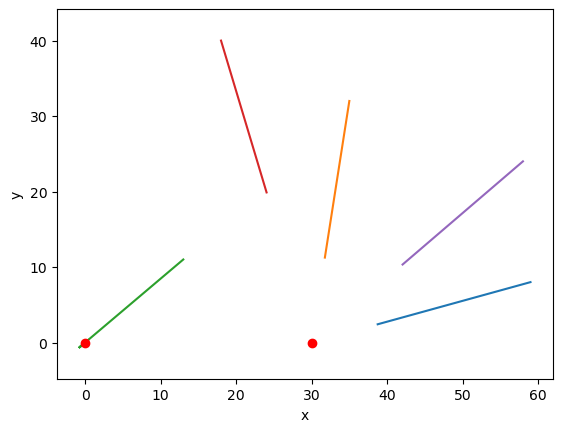

In [47]:
nb_pers = 5
x_max = 60
y_max = 60
people = generer_people(nb_pers,x_max,y_max)
liste_step = step_people(people,sortie,v,dt,tmax)
# print(people)
print(liste_step)


def plot_xy(nb_pers,liste_step):
    pos_x = []
    pos_y = []
    res_x = []
    for i in range(nb_pers):
        pos_x = liste_step[:,i,0]
        pos_y = liste_step[:,i,1]
        plt.plot(pos_x,pos_y)
    plt.axis("equal")


#plot personnes
plot = plot_xy(nb_pers,liste_step)

#sortie
plt.plot(sortie[0][0],sortie[0][1],"ro")
plt.plot(sortie[1][0],sortie[1][1],"ro")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
#obstacle
obs_a = np.array((25,25)) 
obs_b = np.array((35,25))

def positions_obstacle(point_a,point_b,delta_d):
    #ensemble des points d'un obstacle
    #delta_d = distance entre chaque points
    point = point_a
    l_obs = [point]
    dir = direction(point_a,point_b)
    
    d_max = point_b- point_a
    d_max = np.sqrt(d_max[0]**2+d_max[1]**2)
    d = 0
    
    while (d < d_max):
        point = point + dir * delta_d
        l_obs.append(point)
        d = d + delta_d
    return l_obs

obstacle = positions_obstacle(obs_a,obs_b,0.1) #liste des coord des points d'un obstacle
obs_x = [i[0] for i in obstacle]
obs_y = [i[1] for i in obstacle]
print(obstacle)

[array([25, 25]), array([25.1, 25. ]), array([25.2, 25. ]), array([25.3, 25. ]), array([25.4, 25. ]), array([25.5, 25. ]), array([25.6, 25. ]), array([25.7, 25. ]), array([25.8, 25. ]), array([25.9, 25. ]), array([26., 25.]), array([26.1, 25. ]), array([26.2, 25. ]), array([26.3, 25. ]), array([26.4, 25. ]), array([26.5, 25. ]), array([26.6, 25. ]), array([26.7, 25. ]), array([26.8, 25. ]), array([26.9, 25. ]), array([27., 25.]), array([27.1, 25. ]), array([27.2, 25. ]), array([27.3, 25. ]), array([27.4, 25. ]), array([27.5, 25. ]), array([27.6, 25. ]), array([27.7, 25. ]), array([27.8, 25. ]), array([27.9, 25. ]), array([28., 25.]), array([28.1, 25. ]), array([28.2, 25. ]), array([28.3, 25. ]), array([28.4, 25. ]), array([28.5, 25. ]), array([28.6, 25. ]), array([28.7, 25. ]), array([28.8, 25. ]), array([28.9, 25. ]), array([29., 25.]), array([29.1, 25. ]), array([29.2, 25. ]), array([29.3, 25. ]), array([29.4, 25. ]), array([29.5, 25. ]), array([29.6, 25. ]), array([29.7, 25. ]), arr

In [5]:
directions = np.array(((1,0),(-1,0),(0,1),(0,-1)))
coord = np.array((20,30))
coord2 = coord+v*dt*directions[0]
print(coord)
print(coord2)

[20 30]
[21.5 30. ]


In [6]:
def deplace_vers(coord,obstacle,v,dt):
    #coord : coord actuel de la personne
    #obstacle : liste des points
    liste_direction = np.array(((1,0),(-1,0),(0,1),(0,-1))) #droite,gauche,hau,bas
    for i in liste_direction:
        p = coord + v*dt*i #le prochain coord de la personne
        if p not in obstacle :
            return p


coord = np.array((20,30))
print(coord+v*dt*directions[0])
deplace_vers(coord,obstacle,v,dt)
        

def positions_individu(pos,sortie,obstacle,v,dt,t_max):
    res = []
    t = 0
    p = pos
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        if p not in obstacle:
            res.append(p)
        else:
            p = deplace_vers(p,obstacle,v,dt)
        t = t + dt
    return res

[21.5 30. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()